# OBJECTIVE : To predict the price of fuel for a period of 4 weeks based on the price dataset from 2019-2021

In [ ]:
#Importing necessary packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
#importing the dataset
df=pd.read_csv('fuel_price.csv')
df.describe()

,Price,Change,High,Low,Spread,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
count,697.000000,697.000000,697.000000,697.000000,697.000000,0.0,0.0,0.0,0.0,0.0,0.0
mean,326.181492,-0.197991,361.479914,308.558824,52.718795,NaN,NaN,NaN,NaN,NaN,NaN
std,76.266517,9.579873,71.728798,79.194341,17.704953,NaN,NaN,NaN,NaN,NaN,NaN
min,155.500000,-62.000000,197.000000,130.000000,6.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,278.000000,-4.000000,317.500000,257.500000,53.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,324.500000,0.000000,364.500000,304.500000,60.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,383.000000,4.000000,402.000000,373.000000,60.000000,NaN,NaN,NaN,NaN,NaN,NaN
max,587.500000,61.500000,615.000000,532.000000,112.000000,NaN,NaN,NaN,NaN,NaN,NaN


Dropping the unnecessary columns

In [ ]:
df=df.drop(['Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12','Unnamed: 13','Unnamed: 14'],axis=1)

In [ ]:
df['Date']=pd.to_datetime(df['Date']) #converting the date column to datetime format
df.head(10)

,Date,WeekNo,FuelGrade,Port,Price,Change,High,Low,Spread
0,2019-06-29,2019-26,HFO380,Singapore,428.5,13.5,436.0,417.0,19.0
1,2019-07-02,2019-27,HFO380,Singapore,429.0,14.0,436.0,417.0,19.0
2,2019-07-03,2019-27,HFO380,Singapore,425.0,-4.5,437.0,416.5,20.5
3,2019-07-04,2019-27,HFO380,Singapore,426.0,1.0,437.0,421.0,16.0
4,2019-07-05,2019-27,HFO380,Singapore,429.5,3.5,437.0,420.0,17.0
5,2019-07-06,2019-27,HFO380,Singapore,440.0,10.5,448.0,432.0,16.0
6,2019-07-07,2019-28,HFO380,Singapore,440.0,10.5,448.0,432.0,16.0
7,2019-07-08,2019-28,HFO380,Singapore,440.0,10.5,448.0,432.0,16.0
8,2019-07-09,2019-28,HFO380,Singapore,446.5,6.5,457.0,438.0,19.0
9,2019-07-10,2019-28,HFO380,Singapore,451.5,5.0,455.0,449.0,6.0


Plotting price variation with respect to time 

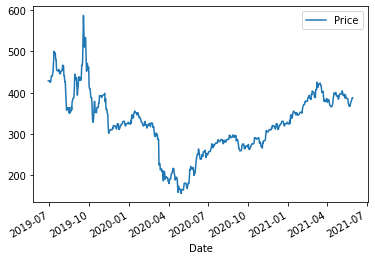

In [ ]:
df.plot('Date','Price')
plt.show()

We can see a sharp price reduction during the time period of Nov 2019 - May 2020 

This is due to the outbreak of the pandemic which decreased the fuel consumption drastically and this resulted in excessive supply.The part of reason is also owed to the disruption in the logistic supply chain of the crude transporation.The storage due to halted ships resulted in heavy maintainence costs driving the fuel price down.

Since this is an unexpected drastic event, To better predict the price of fuel we need to consider the data only from May-2020.

In [ ]:
df.index=df['Date']
df = df.sort_index(ascending=True, axis=0)
df2=df['2020-04-30':'2021-03-30']
df3=df['2021-03-30':'2021-05-30']

In [ ]:
dff = pd.DataFrame(index=range(0,len(df)),columns=['Date','Price'])

for i in range(0,len(df)):
  dff['Date'].values[i] = df['Date'].values[i]
  dff['Price'].values[i] = df['Price'].values[i]


the LSTM code contiues from this previous cell

In [ ]:
from fastai.tabular import add_datepart
add_datepart(dff,'Date')
dff.drop('Elapsed', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/fastai/tabular/transform.py:63: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  for n in attr: df[prefix + n] = getattr(field.dt, n.lower())


Since there is an unexpected drastic event in the dataset, To better predict the price of fuel we need will be considering the data only from May-2020.

Splitting the data into training and validation dataset into 70% and 30% of the original dataset

In [ ]:
train=dff[306:600]
valid=dff[600:]

x_train = train.drop('Price', axis=1) 
y_train = train['Price']

x_valid = valid.drop('Price', axis=1)
y_valid = valid['Price']

In [ ]:
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

model=LinearRegression().fit(x_train,y_train)
#r_sq=model.score(x_train,y_train)

Making a prediction on the validation dataset obtained from Linear regression

In [ ]:
pred=model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(pred)),2)))
rms

24.213274434743234

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


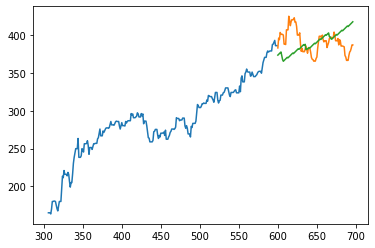

In [ ]:
#Comparing the performance by visualizing on plot

valid['Predictions'] = 0
valid['Predictions'] = pred

valid.index = dff[600:].index
train.index = dff[306:600].index 

plt.plot(train['Price'])
plt.plot(valid[['Price', 'Predictions']])

The green plot indicates the predicted fuel prices using Linear regression from the validation dataset

---



# Using LSTM to predict fuel prices

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [ ]:
df4 = df.sort_index(ascending=True, axis=0)

df5 = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Price'])

for i in range(0,len(df4)):
  df5['Date'][i] = df4['Date'][i]
  df5['Price'][i] = df4['Price'][i]

In [ ]:
df5.index=df5.Date
df5.drop('Date', axis=1, inplace=True)
print(df5)

            Price
Date             
2019-06-29  428.5
2019-07-02    429
2019-07-03    425
2019-07-04    426
2019-07-05  429.5
...           ...
2021-05-26    378
2021-05-27  379.5
2021-05-28    383
2021-05-29  387.5
2021-05-30  387.5

[697 rows x 1 columns]


In [ ]:
dataset = df5.values
train1 = dataset[307:600,:]
valid1 = dataset[600:,:]

In [ ]:
train1

array([[165.0],
       [165.0],
       [163.5],
       [170.0],
       ...,
       [393.5],
       [386.5],
       [386.5],
       [386.5]], dtype=object)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))   #Normalizing the features in the range (0,1)
print(dataset)
scaled_data = scaler.fit_transform(dataset)  
print(scaled_data)  

[[428.5]
 [429.0]
 [425.0]
 [426.0]
 ...
 [379.5]
 [383.0]
 [387.5]
 [387.5]]
[[0.631944]
 [0.633102]
 [0.623843]
 [0.626157]
 ...
 [0.518519]
 [0.52662 ]
 [0.537037]
 [0.537037]]


In [ ]:
x_train1, y_train1 = [], []

g=70
for i in range(g,len(train1)):
  x_train1.append(scaled_data[i-g:i,0])
  y_train1.append(scaled_data[i,0])

x_train1, y_train1 = np.array(x_train1), np.array(y_train1)
print(x_train1)
x_train1 = np.reshape(x_train1, (x_train1.shape[0],x_train1.shape[1],1))
print(x_train1.shape)

[[0.631944 0.633102 0.623843 0.626157 ... 0.585648 0.607639 0.653935 0.653935]
 [0.633102 0.623843 0.626157 0.634259 ... 0.607639 0.653935 0.653935 0.653935]
 [0.623843 0.626157 0.634259 0.658565 ... 0.653935 0.653935 0.653935 0.635417]
 [0.626157 0.634259 0.658565 0.658565 ... 0.653935 0.653935 0.635417 0.650463]
 ...
 [0.390046 0.399306 0.403935 0.385417 ... 0.140046 0.140046 0.140046 0.111111]
 [0.399306 0.403935 0.385417 0.385417 ... 0.140046 0.140046 0.111111 0.106481]
 [0.403935 0.385417 0.385417 0.385417 ... 0.140046 0.111111 0.106481 0.075231]
 [0.385417 0.385417 0.385417 0.366898 ... 0.111111 0.106481 0.075231 0.076389]]
(223, 70, 1)


In [ ]:
x_train1

In [ ]:
modell = Sequential()
modell.add(LSTM(units=50, return_sequences=True, input_shape=(x_train1.shape[1],1)))
modell.add(LSTM(units=50))
modell.add(Dense(1))

In [ ]:
modell.compile(loss='mean_squared_error', optimizer='adam')
modell.fit(x_train1, y_train1, epochs=10, batch_size=1, verbose=2)

Epoch 1/10
223/223 - 22s - loss: 0.0116
Epoch 2/10
223/223 - 5s - loss: 0.0038
Epoch 3/10
223/223 - 5s - loss: 0.0036
Epoch 4/10
223/223 - 5s - loss: 0.0031
Epoch 5/10
223/223 - 5s - loss: 0.0033
Epoch 6/10
223/223 - 5s - loss: 0.0028
Epoch 7/10
223/223 - 5s - loss: 0.0018
Epoch 8/10
223/223 - 5s - loss: 0.0021
Epoch 9/10
223/223 - 5s - loss: 0.0016
Epoch 10/10
223/223 - 5s - loss: 0.0019


Predicting values, using past 70 values from the train data

In [ ]:
inputs = df5[len(df5) - len(valid1) - g:].values
print(inputs.shape)
inputs = inputs.reshape(-1,1)
print(inputs)
inputs  = scaler.transform(inputs)

(167, 1)
[[324.0]
 [324.5]
 [327.0]
 [330.5]
 ...
 [379.5]
 [383.0]
 [387.5]
 [387.5]]


In [ ]:
X_test = []
for i in range(g,inputs.shape[0]):
    X_test.append(inputs[i-g:i,0])
X_test = np.array(X_test)

In [ ]:
print(X_test.shape)

(97, 70)


In [ ]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = modell.predict(X_test)

In [ ]:
closing_price = scaler.inverse_transform(closing_price)
rms1=np.sqrt(np.mean(np.power((valid1-closing_price),2)))

In [ ]:
X_test

In [ ]:
rms1

7.397728139427401

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


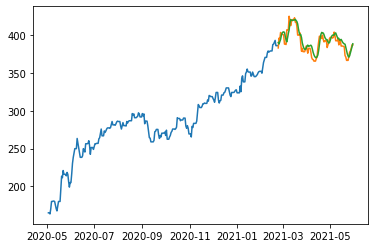

In [ ]:
train2 = df5[307:600]
valid2 = df5[600:]
valid2['Predictions'] = closing_price
plt.plot(train2['Price'])
plt.plot(valid2[['Price','Predictions']])

The green plot shows the predicted fuel prices from the validation dataset. Now using this model,we have to forecast the price for the next 28 days

In [ ]:
len(valid2)

97

In [ ]:
x_input=valid2['Price'].values[27:]
#x_input.reshape((-1,1))
x_input=np.expand_dims(x_input,axis=1)
print(x_input)
x_input = scaler.transform(x_input)
print(x_input)

[[400.5]
 [403.5]
 [388.5]
 [379.0]
 ...
 [379.5]
 [383.0]
 [387.5]
 [387.5]]
[[0.56713 ]
 [0.574074]
 [0.539352]
 [0.517361]
 ...
 [0.518519]
 [0.52662 ]
 [0.537037]
 [0.537037]]


In [ ]:
temp_input=list(x_input)
#temp_input=temp_input[0].tolist()

In [ ]:
print(len(temp_input))

70


In [ ]:
x_input=valid2['Price'].values[27:]
#x_input.reshape((-1,1))
x_input=np.expand_dims(x_input,axis=1)
#print(x_input)
x_input = scaler.transform(x_input)
temp_input=list(x_input)

from numpy import array
lst_output=[]
n_steps=70
i=0

while(i<30):
  #print(i)
  if(len(temp_input)>70):
    #print(temp_input)
    x_input=np.array(temp_input[1:])
    x_input=x_input.reshape(1,-1)
    x_input=x_input.reshape((1,n_steps,1))
    #print(x_input)
    yhat=modell.predict(x_input,verbose=0)
    temp_input.extend(np.array([yhat[0].tolist()]))
    temp_input=temp_input[1:]
    #print(temp_input)
    lst_output.extend(yhat)
    i=i+1
  else:
    x_input=x_input.reshape((1,n_steps,1))
    #print(x_input.shape)
    #print(x_input)
    yhat=modell.predict(x_input,verbose=0)
    #print(yhat[0])
    temp_input.extend(np.array([yhat[0].tolist()]))
    #print(temp_input)
    lst_output.extend(yhat)
    #print(lst_output)
    i=i+1

    


In [ ]:
day_new=np.arange(1,71)
day_pred=np.arange(71,101)

In [ ]:
import matplotlib.pyplot as plt
len(df5)

697

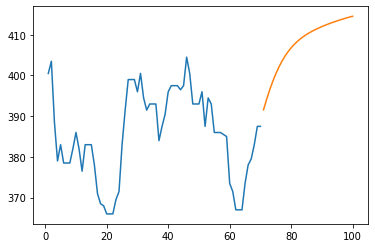

In [ ]:
plt.plot(day_new,df5[627:])
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.show()

In [ ]:
lst_output

Combining the predicted prices with the orignal dataset and plotting on a daily real scale

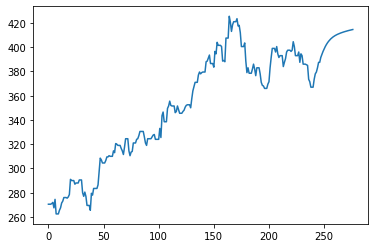

In [ ]:
dfk=df5.values.tolist()
dfk.extend(scaler.inverse_transform(lst_output).tolist())
plt.plot(dfk[300:])
plt.show()

# CONCLUSION:

As we can see the forecasting for the next 30 days is bullish since the fuel price increases from USD 380 per metric tonne to the range of USD 415 per metric tonne and seems to stabilize there.